In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

from DesignMat import Polynomial
from Regressor import Empirical

np.random.seed(1234)
def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

<b> Example </b>

For the polynomial regression model with degree from 0 to 8, we find the optimal value of the evidence function. The empirical bayes approach is applied and the evidence favours the model with degree $= 3$.

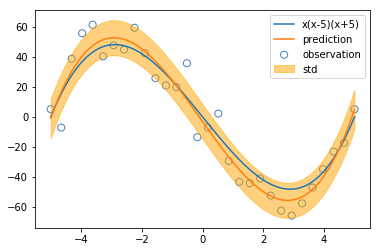

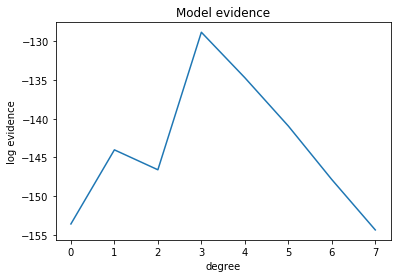

In [2]:
def cubic(x):
    return x * (x - 5) * (x + 5)

x_train, t_train = create_data(cubic, 30, 10, [-5, 5])
x_test = np.linspace(-5, 5, 100)
t_test = cubic(x_test)

phi_train = [Polynomial(i).dm(x_train) for i in range(8)]

models = [Empirical(alpha=100., beta=100.).fit(phi, t_train, max_iter=100) for phi in phi_train]
evidences = [model.log_evidence(phi, t_train) for model, phi in zip(models, phi_train)]

opt_degree = int(np.nanargmax(evidences))

phi_test = Polynomial(opt_degree).dm(x_test)
t, t_std = models[opt_degree].predict_dist(phi_test)

plt.scatter(x_train, t_train, s=50, facecolor="none", edgecolor="steelblue", label="observation")
plt.plot(x_test, t_test, label="x(x-5)(x+5)")
plt.plot(x_test, t, label="prediction")
plt.fill_between(x_test, t - t_std, t + t_std, alpha=0.5, label="std", color="orange")
plt.legend()
plt.show()

plt.plot(evidences)
plt.title("Model evidence")
plt.xlabel("degree")
plt.ylabel("log evidence")
plt.show()